In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#Importing the data

In [ ]:
data=pd.read_csv("Data_Train.csv")
data1=pd.read_csv("Data_Test.csv")

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Length: 10682, dtype: bool

In [ ]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
#coverting date_of_journey,Arrival_time,Dep_time to datetime
def change_into_datetime(col):
  data[col]=pd.to_datetime(data[col])

In [ ]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
  change_into_datetime(i)


In [ ]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [ ]:
data['Date']=data['Date_of_Journey'].dt.day #extracting the day
data['Month']=data['Date_of_Journey'].dt.month #extracting the month
# data['year']=data['Date_of_Journey'].dt.year

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-01-26 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-01-26 05:50:00,2021-01-26 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-01-26 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-01-26 18:05:00,2021-01-26 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-01-26 16:50:00,2021-01-26 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [ ]:
 data.drop('Date_of_Journey',axis=1,inplace=True)#dropping this column as information is already extracted

In [ ]:
#extracting hours 
def extract_hour(df,col):
  df[col+'_hour']=df[col].dt.hour
def extract_min(df,col):
  df[col+'_min']=df[col].dt.minute
def drop_column(df,col):
  df.drop(col,axis=1,inplace=True)  

In [ ]:
 extract_hour(data,'Dep_Time')
 extract_min(data,'Dep_Time')
 drop_column(data,'Dep_Time')

In [ ]:
extract_hour(data,'Arrival_Time')
extract_min(data,'Arrival_Time')
drop_column(data,'Arrival_Time')

In [ ]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [ ]:
duration=list(data['Duration'])
for i in range(len(duration )):
  if len(duration[i].split(' '))==2:
    pass
  else:
     if 'h' in duration[i]:
        duration[i]=duration[i]+' 0m'
     else:
       duration[i]='0h '+duration[i]
         


In [ ]:
data['Duration']=duration

In [ ]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [ ]:
def hour(x):
  return x.split(' ')[0][0:-1]
def minute(x):
  return x.split(' ')[1][0:-1]  

In [ ]:
data['Duration_hours']=data['Duration'].apply(hour)
data['Duration_minutes']=data['Duration'].apply(minute)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [ ]:
drop_column(data,'Duration')

In [ ]:
data['Duration_hours']=data['Duration_hours'].astype(int)
data['Duration_minutes']=data['Duration_minutes'].astype(int)

In [ ]:
data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Date                  int64
Month                 int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Duration_hours        int64
Duration_minutes      int64
dtype: object

In [ ]:
#printing all the categorical columns
cat_col=[col for col in data.columns if data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [ ]:
#print all the columns having continuous values
cont_col=[col for col in data.columns if data[col].dtype!='O']
cont_col

['Price',
 'Date',
 'Month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'Duration_hours',
 'Duration_minutes']

In [ ]:
## Nominal data :one hot encoding[like country]
## ordinal data:label encoding[yes,no type ]

In [ ]:
categorical=data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [ ]:
categorical.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
dtype: object

In [ ]:
categorical['Route'][0].split('→')

['BLR ', ' DEL']

In [ ]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

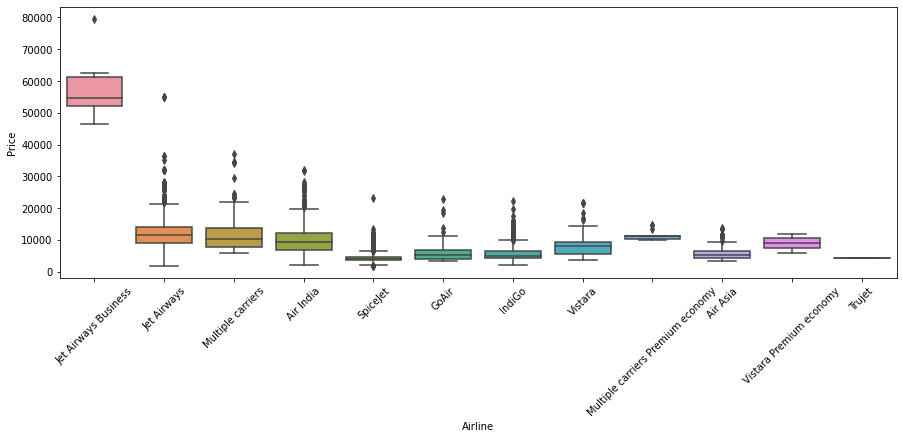

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

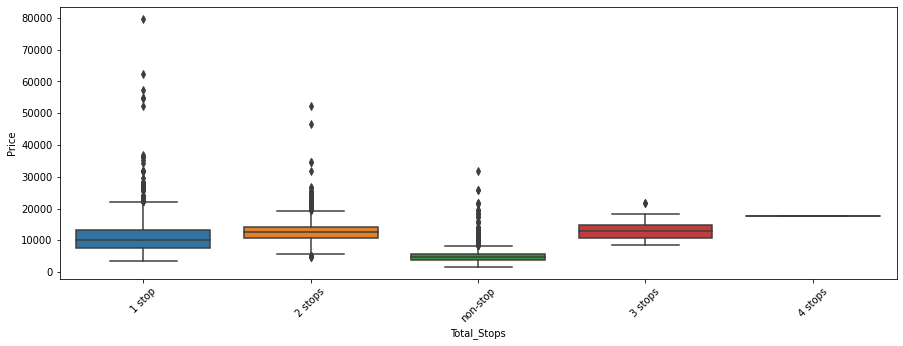

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Total_Stops',y='Price',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

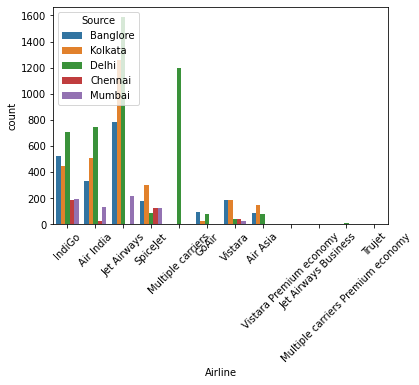

In [ ]:
#visualizing the number of flights from different sources
sns.countplot(x='Airline',hue='Source',data=data)
plt.xticks(rotation=45)
#most of the flights depart from delhi

In [ ]:
#performing one hot encoding
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

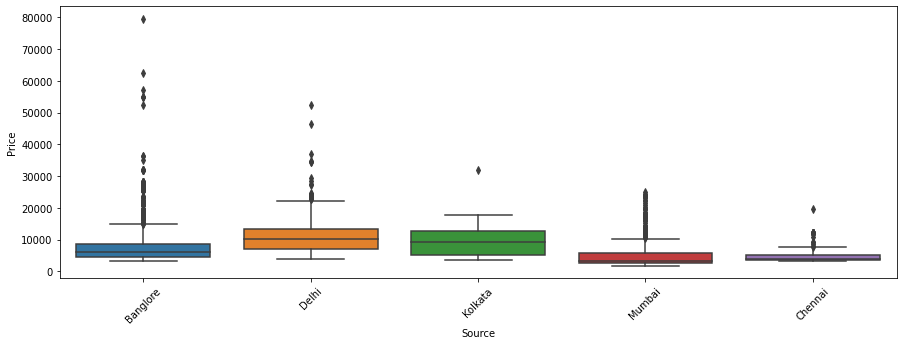

In [ ]:
#SEEING THE DISTRIBUTION OF SOURCE
plt.figure(figsize=(15,5))
sns.boxplot(x='Source',y='Price',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation=45)


In [ ]:
Source=pd.get_dummies(categorical['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
 Destination=pd.get_dummies(categorical['Destination'],drop_first=True)
 Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

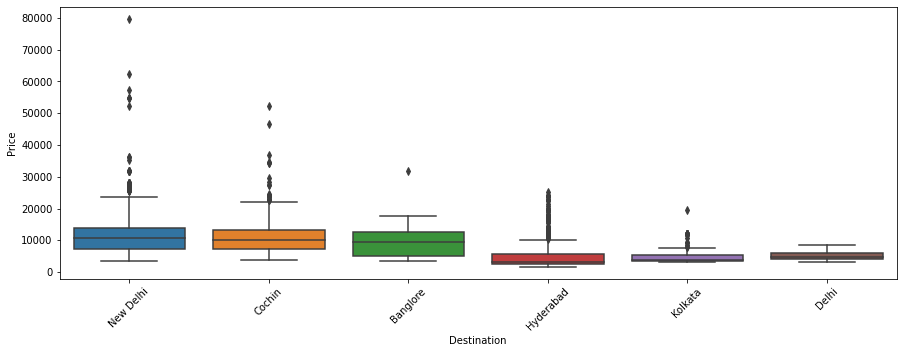

In [ ]:
#SEEING THE DISTRIBUTION OF SOURCE
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination',y='Price',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation=45)
#flights going to delhi have the highest fare ,flighs going to kolkata has a lowest fare

In [ ]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
dtype: int64

In [ ]:
# for i in (categorical["Route"]):
#     cat=i.split("→")

categorical['Route1']=categorical["Route"].str.split("→").str[0]
categorical['Route2']=categorical["Route"].str.split("→").str[1]
categorical['Route3']=categorical["Route"].str.split("→").str[2]
categorical['Route4']=categorical["Route"].str.split("→").str[3]
categorical['Route5']=categorical["Route"].str.split("→").str[4]
# categorical.drop(columns="Route",inplace=True)

# categorical["Route_2"]=categorical["Route"].str.split("->").str[1:2]
# categorical["Route_3"]=categorical["Route"].str.split("->").str[2:3]
# categorical["Route_4"]=categorical["Route"].str.split("->").str[3:4]
# categorical["Route_5"]=categorical["Route"].str.split("->").str[4:5]

In [ ]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [ ]:
categorical["Route"][25]

'DEL → IDR → BOM → COK'

In [ ]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [ ]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [ ]:
for i in ['Route3','Route4','Route5']:
  categorical[i].fillna('None',inplace=True)

In [ ]:
#counting the number of categories in different columns
for i in categorical.columns:
  print("{} has total {} categories".format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Route has total 128 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [ ]:
 for i in ['Route1','Route2', 'Route3', 'Route4', 'Route5']:
   categorical[i]=encoder.fit_transform(categorical[i])


In [ ]:
drop_column(categorical,'Additional_Info')

In [ ]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,0,34,8,13,5


In [ ]:
dict={'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4}

In [ ]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [ ]:
drop_column(categorical,'Route')

In [ ]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [ ]:
data_t=pd.concat([categorical,Airline,Source,Destination,data[cont_col]],axis=1)

In [ ]:
 data_t.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Date,Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [ ]:
drop_column(data_t,'Airline')
drop_column(data_t,'Source')
drop_column(data_t,'Destination')

In [ ]:
data_t.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Date,Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [ ]:
pd.set_option("display.max_columns",35)
data_t.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Date,Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


OULIER DETECTION AND OUTLIER IMPUTATION IF AVAILABLE IN DATA

In [ ]:
#creatimg multiple subplots
def plot(df,col):
  fig,(ax1,ax2)=plt.subplots(2,1)
  sns.distplot(df[col],ax=ax1)
  sns.boxplot(df[col],ax=ax2 )

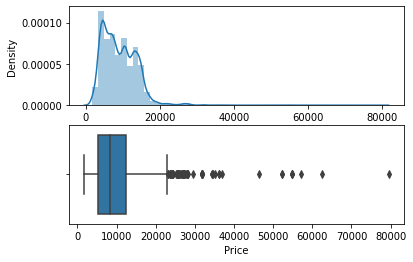

In [ ]:
plot(data_t,'Price')

replacing price greater than 40000 with the median so the outliers may be removed

In [ ]:
 data_t['Price']=np.where(data_t['Price']>=40000,data_t['Price'].median(),data_t['Price'])

In [ ]:
#now again plotting it 
def plot(df,col):
  fig,(ax1,ax2)=plt.subplots(2,1)
  sns.distplot(df[col],ax=ax1)
  sns.boxplot(df[col],ax=ax2 )


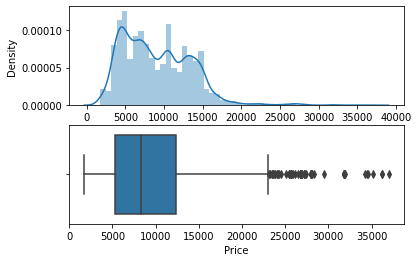

In [ ]:
plot(data_t,'Price')

#not have far beyond outliers

In [ ]:
X=data_t.drop('Price',axis=1)
X.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Date,Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [ ]:
y=data_t['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

Feature selection

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)#measures the dependency among features,#higher value means higher dependency,0 value implies feature independence

array([2.16704695, 2.08027519, 2.82296098, 2.3156194 , 1.42320103,
       0.72606541, 0.74677144, 0.10439356, 0.65734742, 0.91727585,
       0.01832389, 0.58130313, 0.02032356, 0.33145593, 0.00421333,
       0.23077016, 0.00901438, 0.15868589, 1.55220999, 0.88614571,
       0.28901818, 1.56080699, 0.39059817, 0.29832693, 0.17564823,
       0.37361272, 1.05981775, 0.8534859 , 1.43557251, 1.22901259,
       1.8447792 , 1.50948308, 1.79684829, 1.09856468])

In [ ]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.145282
Route1,2.030799
Route2,2.803997
Route3,2.297757
Route4,1.468215
Route5,0.741854
Air India,0.739560
GoAir,0.097640
IndiGo,0.664669
Jet Airways,0.911219


In [ ]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route2,2.803997
Route3,2.297757
Total_Stops,2.145282
Route1,2.030799
Arrival_Time_hour,1.838582
Duration_hours,1.762804
Delhi,1.581111
Arrival_Time_min,1.545154
Cochin,1.542870
Route4,1.468215


applying machine learning algorithm

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn import metrics
import seaborn as sns
import  numpy as np
def predict(ml_model):
  model=ml_model.fit(X_train,y_train)
  print("Training Scoremodel:{}".format(model.score(X_train,y_train)))
  predictions= model.predict(X_test)
  print("Predictions are:{}".format(predictions))
  print("\n ")
  r2_Score= metrics.r2_score(y_test,predictions)
  print("r2 score is:{}".format(r2_Score))
  print("MAE:",metrics.mean_absolute_error(y_test,predictions))
  print("MSE:",metrics.mean_squared_error(y_test,predictions))
  print("RMSE:",np.sqrt(metrics.mean_absolute_error(y_test,predictions)))
  sns.distplot(y_test-predictions)
  


Training Scoremodel:0.9541026113883831
Predictions are:[14150.24       11724.40833333 13070.7805     ... 11277.3
  5860.18        5582.75      ]

 
r2 score is:0.8294105190859029
MAE: 1136.1421739412253
MSE: 3096906.5054820334
RMSE: 33.706708144540386


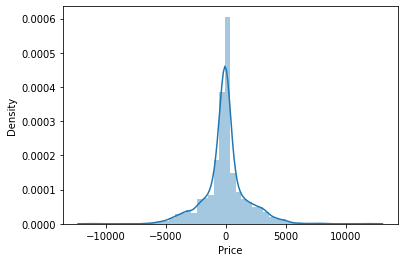

In [ ]:
 from sklearn.ensemble import RandomForestRegressor
 predict(RandomForestRegressor())

Training Scoremodel:0.6175847208760286
Predictions are:[12731.80303395 11325.03951317 12931.75935123 ... 11156.42445291
  6097.03142199  7086.80581862]

 
r2 score is:0.6066598894141294
MAE: 1937.3680337406388
MSE: 7140754.170849589
RMSE: 44.0155430926467


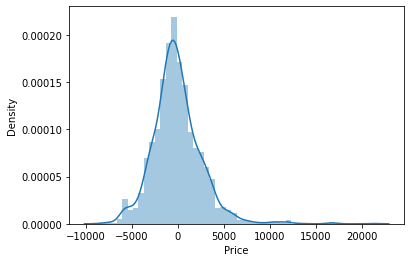

In [ ]:
from sklearn.linear_model import LinearRegression
predict(LinearRegression())

Training Scoremodel:0.9685496687687447
Predictions are:[14594. 10844. 14714. ... 10991.  5228.  5583.]

 
r2 score is:0.7171095849849194
MAE: 1330.274840118546
MSE: 5135634.166328706
RMSE: 36.472932979382755


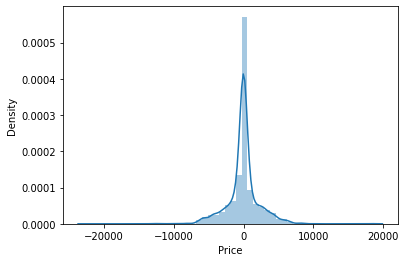

In [ ]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor())

In [ ]:
#after analysing these three algorithms randomForestRegressor proves to be the best

In [ ]:
#applying gridsearchcv,crossvalidation methodsand randomized search cv 

In [ ]:
 from sklearn.model_selection import RandomizedSearchCV
 

In [ ]:
# RandomizedSearchCV( )

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_depth =[int(x) for x in np.linspace(start=5,stop=30,num=4)]

In [ ]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]
}

In [ ]:
random_grid

{'max_depth': [5, 13, 21, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10, 15, 100],
 'n_estimators': [100, 320, 540, 760, 980, 1200]}

In [ ]:
reg_rf=RandomForestRegressor()#verbose whatever activity is going on 

In [ ]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': 13,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 980}

In [ ]:
prediction=rf_random.predict(X_test)

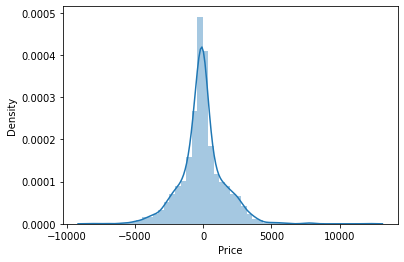

In [ ]:
sns.distplot(y_test-prediction)

In [ ]:
metrics.r2_score(y_test,prediction)#ur accuracy increased after applying hypertuning

0.8586681333428882